In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils.shabanipy.labber import LabberData
from utils.jy_mpl_settings.settings import jy_mpl_rc
from utils.jy_mpl_settings.colors import line_colors
import utils.fluxonium_functions as ff
plt.style.use(jy_mpl_rc)
root = '/Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/data'
plt.rcParams["font.family"] = "DejaVu Sans"

In [3]:
# Define a list of tuples, where each tuple specifies a unique line style for plotting.
# Each tuple has two elements: the first element is 0 (indicating it's a dashed line),
# and the second element is a tuple that specifies the dash pattern.
linestyle_tuple = [(0, (2, 6)),  # Dashed line with a pattern of 2 units on, 6 units off
                   (0, (3, 3, 1, 3, 1, 3)),  # Dashed line with a repeating pattern of 3 units on, 3 units off, etc.
                   (0, (3, 1, 1, 6)),  # Dashed line with a pattern of 3 units on, 1 unit off, 1 unit on, 6 units off
                   (0, (1, 3)),  # Dashed line with a pattern of 1 unit on, 3 units off
                   (0, (5, 7)),  # Dashed line with a pattern of 5 units on, 7 units off
                   (0, (4, 6))]  # Dashed line with a pattern of 4 units on, 6 units off


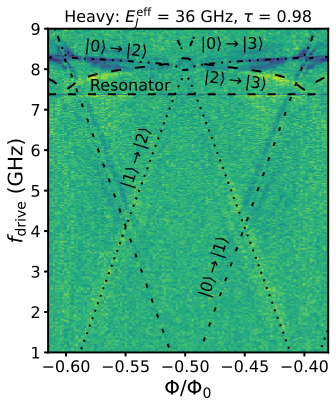

In [5]:
# Define variables for the sample, cooldown, people, channels, and file information.
sample = 'JS801-4fluxonium@v5-01'
cooldown = '02'
people = 'WMSLJB'
channels = ['SC3 - Drive - Frequency', 'Qcage - Magnet - Source voltage', 'VNA - S21']

# Define the specific file number and the date.
file_num = '948'
day = '04'
month = '04'
year = '2024'

# Define the flux extent for plotting.
flux_extent = [-.615, -.38]

# Extract data from the specified file using 'ff.extract_data'. This will read data from the channels defined above.
drive, magnet, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                        channels=channels)

# Get unique values for magnet and drive signals, and take the absolute value of the signal.
magnet = np.unique(magnet)
drive = np.unique(drive)
signal = abs(signal)

# Convert the signal to decibels using the 'ff.to_db' function.
signal = ff.to_db(signal)

# Apply dynamic slicing to the signal using 'ff.dynamic_slice', with dispersive set to 0.
signal = -ff.dynamic_slice(signal, dispersive=0)

# Create a figure for plotting the signal data.
fig, ax = ff.plot_data(signal, 
                       xlim=flux_extent,  # Set the x-axis limits to the flux extent.
                       ylim=drive * 1e-9,  # Set the y-axis limits based on the drive signal (scaled by 1e-9).
                       figsize=(5, 6),  # Set the figure size.
                       cbar=False,  # Disable the colorbar.
                      )

# Define constants for the system.
K, T = 36.5, .98  # K is the effective Josephson energy in GHz, and T is a temperature-like parameter.
step = 51  # Define the step for frequency calculation.

# Get the nonsine frequencies and the external phase axis using 'ff.get_nonsine_freqs_Sm'.
omegat, phi_ext_ax = ff.get_nonsine_freqs_Sm(flux=flux_extent, K=K, T=T, step=step)

# Plot the calculated frequencies for the first three elements of 'omegat', using different line styles.
for i, x in enumerate(omegat[0:3]):
    ax.plot(phi_ext_ax / (2 * np.pi), x, linestyle=linestyle_tuple[i], color='k')

# Plot the differences between the second and first, and third and first frequencies.
plt.plot(phi_ext_ax / (2 * np.pi), omegat[1] - omegat[0], color='black', linestyle=linestyle_tuple[3])
plt.plot(phi_ext_ax / (2 * np.pi), omegat[2] - omegat[0], color='black', linestyle=linestyle_tuple[4])

# Set the y-axis limits for the plot.
plt.ylim(1, 9)

# Add a horizontal line at y = 7.38 with a specific line style.
plt.axhline(y=7.38, linestyle=linestyle_tuple[-1], color='k')

# Annotate specific points on the plot with labels indicating transitions between states.
ax.annotate(r"$|0\rangle \rightarrow |1\rangle$", xy=(-.49, 2.4), color='k', rotation=72)
ax.annotate(r"$|0\rangle \rightarrow |2\rangle$", xy=(-.585, 8.3), color='k', rotation=-6)
ax.annotate(r"$|0\rangle \rightarrow |3\rangle$", xy=(-.487, 8.5), color='k')
ax.annotate(r"$|1\rangle \rightarrow |2\rangle$", xy=(-.555, 5.1), color='k', rotation=72)
ax.annotate(r"$|2\rangle \rightarrow |3\rangle$", xy=(-.485, 7.5), color='k', rotation=-7)
ax.annotate(r"Resonator", xy=(-.58, 7.47), color='k')

# Set the title of the plot with the effective Josephson energy and temperature.
plt.title(f'Heavy: $E_J^\mathrm{{eff}}$ = {int(K)} GHz, '+r'$\tau$'+f' = 0.98', fontsize=16)

# Adjust the layout to ensure everything fits within the plot.
plt.tight_layout()

# Save the figure as a PDF to the specified location.
plt.savefig(f'figs_final/fig4b.pdf', format='pdf')


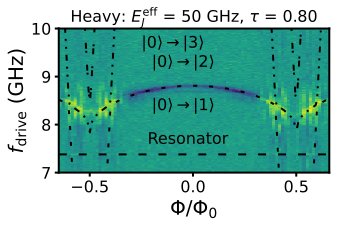

In [6]:
# Define variables for the sample, cooldown, people, channels, and file information.
sample = 'JS801-4fluxonium@v5-01'
cooldown = '02'
people = 'WMSLJB'
channels = ['SC3 - Drive - Frequency', 'Qcage - Magnet - Source voltage', 'VNA - S21']
file_num = '173'

# Extract data from the specified file using 'ff.extract_data'. This will read data from the channels defined above.
drive, magnet, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                        channels=channels)

# Get unique values for magnet and drive signals, and take the absolute value of the signal.
magnet = np.unique(magnet)
drive = np.unique(drive)
signal = abs(signal)

# Signal from the first entry (index 0) of 'signal' array.
signal_vg1 = signal[0]

# Compute the average of the signal within the selected index range (40:47), then average the data further.
signal_avg = np.mean(signal_vg1[:,:,40:47], axis=2)
signal_avg = ff.average_data(signal_avg)

# Transpose and reverse the averaged signal data.
signal_avg = signal_avg.T[::-1]

# Remove any NaN values from the magnet and drive data.
magnet = magnet[~np.isnan(magnet)]
drive = drive[~np.isnan(drive)]

# Define the flux extent for plotting.
flux_extent = [-.65, .66]

# Create a figure to plot the averaged signal data.
fig, ax = ff.plot_data(signal_avg, 
                       xlim=flux_extent,  # Set the x-axis limits to the flux extent.
                       ylim=drive * 1e-9,  # Set the y-axis limits based on the drive signal (scaled by 1e-9).
                       figsize=(5, 3.5),  # Set the figure size.
                       cbar=False  # Disable the colorbar.
                      )

# Define constants for the system.
K, T, step = 50.7, .8, 201  # K is the effective Josephson energy in GHz, T is a temperature-like parameter, step defines the frequency step.

# Get the nonsine frequencies and the external phase axis using 'ff.get_nonsine_freqs_Sm'.
omegat, phi_ext_ax = ff.get_nonsine_freqs_Sm(flux=flux_extent, K=K, T=T, step=step)

# Plot the calculated frequencies for each element of 'omegat', using different line styles.
for i, x in enumerate(omegat):
    ax.plot(phi_ext_ax / (2 * np.pi), x, color='k', linestyle=linestyle_tuple[i])

# Add a horizontal line at y = 7.38 with a specific line style.
plt.axhline(y=7.38, linestyle=linestyle_tuple[-1], color='k')

# Annotate specific points on the plot with labels indicating transitions between states.
ax.annotate(r"$|0\rangle \rightarrow |1\rangle$", xy=(-.2, 8.3), color='k')
ax.annotate(r"$|0\rangle \rightarrow |2\rangle$", xy=(-.2, 9.2), color='k')
ax.annotate(r"$|0\rangle \rightarrow |3\rangle$", xy=(-.25, 9.6), color='k')
ax.annotate(r"Resonator", xy=(-.22, 7.6), color='k')

# Set the y-axis limits for the plot.
plt.ylim(7, 10)

# Set the title of the plot with the effective Josephson energy and temperature.
plt.title(f'Heavy: $E_J^\mathrm{{eff}}$ = {int(K)} GHz, '+r'$\tau$'+f' = 0.80', fontsize=16)

# Adjust the layout to ensure everything fits within the plot.
plt.tight_layout()

# Save the figure as a PDF to the specified location.
plt.savefig(f'figs_final/fig4a.pdf', format='pdf')


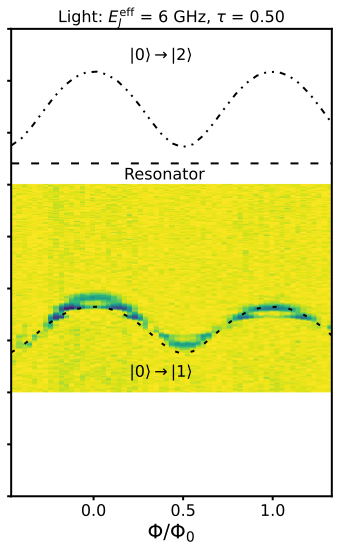

In [6]:
# Define variables for the sample, cooldown, people, file number, and channels to be used in data extraction.
sample = 'JS801-4fluxonium@v5-01'
cooldown = '02'
people = 'WMSLJB'
file_num = '050'
channels = ['SC3 - Drive - Frequency', 'Qcage - Magnet - Source voltage', 'VNA - S21']

# Extract data from the specified file using 'ff.extract_data'. The data for the given channels is retrieved.
drive, magnet, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                        channels=channels)

# Remove duplicate values from the drive and magnet data and take the absolute value of the signal.
drive = np.unique(drive)
magnet = np.unique(magnet)
signal = abs(signal)

# Remove any NaN values from the magnet data.
magnet = magnet[~np.isnan(magnet)]

# Define the flux extent for plotting.
flux_extent = [-.46, 1.33]

# Take the average of the signal in the range from index 6 to 10 along the third axis.
signal = np.mean(signal[:,:,6:10], axis=2)

# Further process the signal: average it and normalize it.
signal = ff.average_data(signal)
signal = ff.normalize(signal.T[::-1])

# Take the negative of the absolute value of the signal.
signal = -abs(signal)

# Create a figure to plot the processed signal data.
fig, ax = ff.plot_data(signal, 
        xlim=flux_extent,  # Set the x-axis limits to the flux extent.
        ylim=[drive[0]*1e-9, drive[-1]*1e-9],  # Set the y-axis limits based on the drive data, scaled by 1e-9.
        figsize=(5, 8),  # Set the figure size.
        cbar=False  # Disable the colorbar.
)

# Define constants for the system.
K, T = 6, .5  # K is the effective Josephson energy in GHz, T is a temperature-like parameter.
step = 31  # The step size for calculating the frequencies.

# Get the nonsine frequencies and the external phase axis using 'ff.get_nonsine_freqs_Sm'.
omegat, phi_ext_ax = ff.get_nonsine_freqs_Sm(flux=flux_extent, K=K, T=T, step=step)

# Plot the calculated frequencies for each element of 'omegat', using different line styles.
for i, x in enumerate(omegat[0:2]):
    ax.plot(phi_ext_ax / (2 * np.pi), x, color='k', linestyle=linestyle_tuple[i])

# Add a horizontal line at y = 7.41 with a specific line style.
plt.axhline(y=7.41, linestyle=linestyle_tuple[-1], color='k')

# Set the title of the plot with the effective Josephson energy and temperature.
plt.title(f'Light: $E_J^\mathrm{{eff}}$ = {K} GHz, '+r'$\tau$ = 0.50', fontsize=16)

# Annotate specific points on the plot with labels indicating transitions between states.
ax.annotate(r"$|0\rangle \rightarrow |1\rangle$", xy=(.2, 3.3), color='k')
ax.annotate(r"$|0\rangle \rightarrow |2\rangle$", xy=(.2, 9.4), color='k')
ax.annotate(r"Resonator", xy=(.17, 7.1), color='k')

# Remove the left axis ticks and labels.
plt.tick_params(labelleft=False)

# Remove the y-axis label.
plt.ylabel('')

# Set the y-axis limits for the plot.
plt.ylim(1, 10)

# Adjust the layout to ensure everything fits within the plot.
plt.tight_layout()

# Save the figure as a PDF to the specified location.
plt.savefig(f'figs_final/fig4d.pdf', format='pdf')


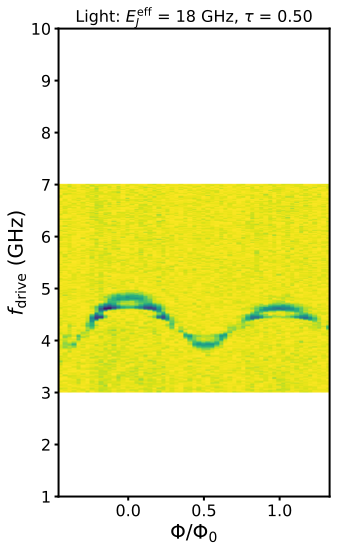

In [13]:
# Define the sample, cooldown, people, file number, and channels for data extraction.
sample = 'JS801-4fluxonium@v5-01'
cooldown = '02'
people = 'WMSLJB'
file_num = '050'
channels = ['SC3 - Drive - Frequency', 'Qcage - Magnet - Source voltage', 'VNA - S21']

# Extract data from the specified file using 'ff.extract_data'. The data for the given channels is retrieved.
drive, magnet, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                        channels=channels)

# Remove duplicate values from the drive data and take the absolute value of the signal.
magnet = np.unique(magnet)
drive = np.unique(drive)
signal = abs(signal)

# Remove any NaN values from the magnet data.
magnet = magnet[~np.isnan(magnet)]

# Define the flux extent for plotting.
flux_extent = [-.46, 1.33]

# Take the average of the signal in the range from index 6 to 10 along the third axis.
signal = np.mean(signal[:,:,6:10], axis=2)

# Further process the signal: average it and normalize it.
signal = ff.average_data(signal)
signal = ff.normalize(signal.T[::-1])

# Take the negative of the absolute value of the signal.
signal = -abs(signal)

# Create a figure to plot the processed signal data.
fig, ax = ff.plot_data(signal, 
        xlim=flux_extent,  # Set the x-axis limits to the flux extent.
        ylim=[drive[0]*1e-9, drive[-1]*1e-9],  # Set the y-axis limits based on the drive data, scaled by 1e-9.
        figsize=(5, 8),  # Set the figure size.
        cbar=False  # Disable the colorbar.
)

# Set the title of the plot with the effective Josephson energy and temperature.
plt.title(f'Light: $E_J^\mathrm{{eff}}$ = {K} GHz, '+r'$\tau$ = 0.50', fontsize=16)

# Remove the left axis ticks and labels.
# plt.tick_params(labelleft=False)

# Remove the y-axis label.
# plt.ylabel('')

# Set the y-axis limits for the plot.
plt.ylim(1, 10)

# Adjust the layout to ensure everything fits within the plot.
plt.tight_layout()

# Save the figure as a PDF to the specified location.
plt.savefig(f'figs_final/fig4d.pdf', format='pdf')


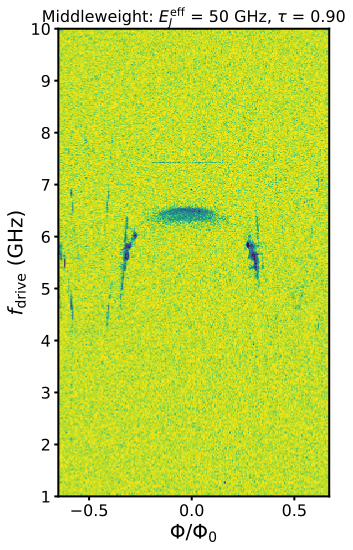

In [7]:
# Define the sample, cooldown, people, file number, and channels for data extraction.
sample = 'JS801-4fluxonium@v5-01'
cooldown = '02'
people = 'WMSLJB'
file_num = '108'
channels = ['SC3 - Drive - Frequency', 'Qcage - Magnet - Source voltage', 'VNA - S21']

# Extract data from the specified file using 'ff.extract_data'. The data for the given channels is retrieved.
drive, magnet, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                        channels=channels)

# Remove duplicate values from the magnet and drive data, and take the absolute value of the signal.
magnet = np.unique(magnet)
drive = np.unique(drive)
signal = abs(signal)

# Remove any NaN values from the magnet data.
magnet = magnet[~np.isnan(magnet)]

# Define the flux extent for plotting.
flux_extent = [-0.65, 0.67]

# Combine specific signal slices to create a new signal.
signal = signal[0,:,:,2] + signal[0,:,:,3] + signal[0,:,:,4] + signal[0,:,:,8]

# Process the signal: average it and normalize it.
signal = ff.average_data(signal)
signal = ff.normalize(signal.T[::-1])

# Take the negative of the absolute value of the signal.
signal = -abs(signal)

# Create a figure to plot the processed signal data.
fig, ax = ff.plot_data(signal, 
        xlim=flux_extent,  # Set the x-axis limits to the flux extent.
        ylim=[0.1, 20],  # Set the y-axis limits.
        figsize=(5, 8),  # Set the figure size.
        zlim=[-3.5, 0],  # Set the z-axis limits.
        cbar=False  # Disable the colorbar.
)

# Set the title of the plot with the effective Josephson energy and temperature.
plt.title(f'Middleweight: $E_J^\mathrm{{eff}}$ = {int(K)} GHz, '+r'$\tau$'+f' = 0.90', fontsize=16)

# Set the y-axis limits for the plot.
plt.ylim(1, 10)

# Adjust the layout to ensure everything fits within the plot.
plt.tight_layout()

# Save the figure as a PDF to the specified location.
plt.savefig(f'figs_final/fig4c.pdf', format='pdf')
